In [191]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random

First we generate trajectories:

In [192]:
def generate_trajectory(N_timesteps=1000, num_states=4, p_rest=0.2):
    """We wish to simulate a mouse trajectory on a square track with four discrete states,
    for now corresponding to the four corners of the square."""
    trajectory = np.empty(N_timesteps, dtype=int)
    trajectory[0] = np.random.randint(num_states)
    for t in range(1, N_timesteps):
        if np.random.rand() < p_rest:
            trajectory[t] = trajectory[t - 1]
        else:
            trajectory[t] = np.random.randint(num_states)
    return trajectory

def one_hot_encode_trajectory(state, num_states=4):
    """Take a 1-D trajectory time series as input and return a one-hot encoded version."""
    one_hot_trajectory = np.zeros((len(state), num_states), dtype=int)
    for t, s in enumerate(state):
        one_hot_trajectory[t][s] = 1
    return one_hot_trajectory

Training function based on an input time-series:

In [193]:
def train_hebbian(one_hot_trajectory, eta=0.1, gamma=1, mu=0.1):
    """
    Run Hebbian learning across the time series.
    - eta: equivalent to a learning rate of sorts
    - gamma: decay factor
    """
    W = 1 + 0.1*np.random.randn(4, 4)
    M = np.full((4, 4), -mu)
    np.fill_diagonal(M, 0)
    # Weight matrix (each row corresponds to a neuron, and each column to an input state)

    # M is the weight matrix for inhibition
    # We need to 
    
    for x in one_hot_trajectory:
        y = np.dot(W, x.T) # Calculate output (y = W * x) using matrix multiplication
        W += eta*np.outer(y, x.T) + gamma*W*M
        W = W / np.linalg.norm(W, axis=1, keepdims=True)
    
    return W

# LMAO

Simulating the entire thing in one go:

In [194]:
# Parameters
N = 10000
eta = 0.001
#gamma = 0.1

trajectory = generate_trajectory(N)
one_hot_trajectory = one_hot_encode_trajectory(trajectory)

W_final = train_hebbian(one_hot_trajectory, eta)

Visualisation:

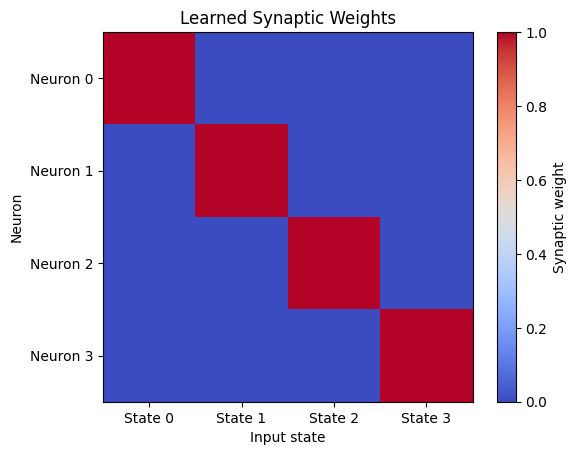

In [197]:
%matplotlib inline

plt.imshow(W_final, cmap='coolwarm')
plt.colorbar(label='Synaptic weight')
plt.xticks(ticks=np.arange(4), labels=[f'State {i}' for i in range(4)])
plt.yticks(ticks=np.arange(4), labels=[f'Neuron {i}' for i in range(4)])
plt.xlabel('Input state')
plt.ylabel('Neuron')
plt.title('Learned Synaptic Weights')
plt.show()

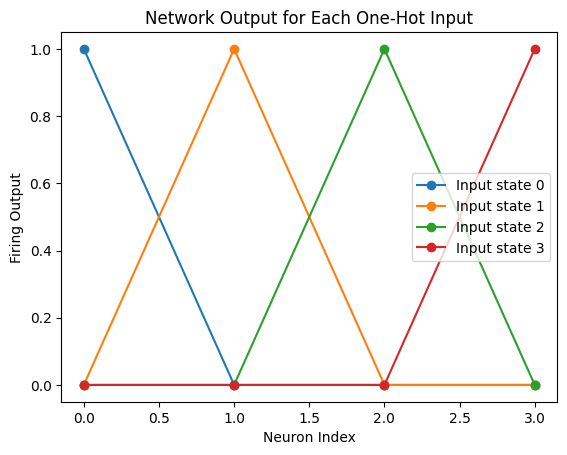

In [196]:
%matplotlib inline

x_vectors = one_hot_encode_trajectory([0, 1, 2, 3])
y_vectors = [np.dot(W_final, x) for x in x_vectors.T]

plt.figure()
for i, y in enumerate(y_vectors):
    plt.plot(y, marker='o', label=f'Input state {i}')
plt.xlabel('Neuron Index')
plt.ylabel('Firing Output')
plt.title('Network Output for Each One-Hot Input')
plt.legend()
plt.show()